In [363]:
import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting import simple_plot

import pandas as pd
import numpy as np
import cvxpy as cp
import networkx as nx

## Create network

In [364]:
# # 2-bus simple case

# net = pp.create_empty_network(sn_mva=1)

# # buses
# pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=0)
# pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=1)

# #lines
# pp.create_line_from_parameters(net, 0, 1, length_km=1, r_ohm_per_km=1, x_ohm_per_km=1, c_nf_per_km=0, max_i_ka=0, index=0)

# # generators
# pp.create_ext_grid(net, 0, max_p_mw=1, min_p_mw=0, max_q_mvar=1, min_q_mvar=-1, index=0)
# pp.create_poly_cost(net, 0, "ext_grid", cp1_eur_per_mw=1, cp0_eur=0, cq1_eur_per_mvar=0, cq0_eur=0, cp2_eur_per_mw2=0, cq2_eur_per_mvar2=0, index=None)

# # loads
# pp.create_load(net, 1, p_mw=0.01, q_mvar=0, index=0)

In [365]:
# 3-bus no cycle simple case

net = pp.create_empty_network(sn_mva=1)

# buses
pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=0)
pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=1)
pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=2)

#lines
pp.create_line_from_parameters(net, 0, 1, length_km=1, r_ohm_per_km=5, x_ohm_per_km=2, c_nf_per_km=0, max_i_ka=0, index=0)
pp.create_line_from_parameters(net, 2, 0, length_km=1, r_ohm_per_km=1, x_ohm_per_km=1, c_nf_per_km=0, max_i_ka=0, index=1)

# generators
pp.create_ext_grid(net, 0, max_p_mw=1, min_p_mw=0, max_q_mvar=1, min_q_mvar=-1, index=0)
pp.create_poly_cost(net, 0, "ext_grid", cp1_eur_per_mw=1, cp0_eur=0, cq1_eur_per_mvar=0, cq0_eur=0, cp2_eur_per_mw2=0, cq2_eur_per_mvar2=0, index=None)

# loads
pp.create_load(net, 1, p_mw=0.01, q_mvar=0, index=0)
pp.create_load(net, 2, p_mw=0.01, q_mvar=0, index=1)

1

In [366]:
# # 3-bus simple case

# net = pp.create_empty_network(sn_mva=1)

# # buses
# pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=0)
# pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=1)
# pp.create_bus(net, vn_kv=1, max_vm_pu=1.1, min_vm_pu=0.9, index=2)

# #lines
# pp.create_line_from_parameters(net, 0, 1, length_km=1, r_ohm_per_km=1, x_ohm_per_km=1, c_nf_per_km=0, max_i_ka=0, index=0)
# pp.create_line_from_parameters(net, 1, 2, length_km=1, r_ohm_per_km=1, x_ohm_per_km=1, c_nf_per_km=0, max_i_ka=0, index=1)
# pp.create_line_from_parameters(net, 2, 0, length_km=1, r_ohm_per_km=1, x_ohm_per_km=1, c_nf_per_km=0, max_i_ka=0, index=2)

# # generators
# pp.create_ext_grid(net, 0, max_p_mw=1, min_p_mw=0, max_q_mvar=1, min_q_mvar=-1, index=0)
# pp.create_poly_cost(net, 0, "ext_grid", cp1_eur_per_mw=1, cp0_eur=0, cq1_eur_per_mvar=0, cq0_eur=0, cp2_eur_per_mw2=0, cq2_eur_per_mvar2=0, index=None)

# # loads
# pp.create_load(net, 1, p_mw=0.01, q_mvar=0, index=0)
# pp.create_load(net, 2, p_mw=0.01, q_mvar=0, index=1)

In [367]:
# net = pn.case6ww()
# # net.sn_mva = 100

In [368]:
# for i in range(len(net.bus)):
#     net.bus.vn_kv[i] = 1

In [369]:
# net.bus

In [370]:
# net.line.r_ohm_per_km = net.line.r_ohm_per_km / (230)**2 * 100

In [371]:
# net.line.x_ohm_per_km = net.line.x_ohm_per_km / (230)**2 * 100

In [372]:
# net.line

In [373]:
# net = pn.case9()
# net.sn_mva = 100

In [374]:
# # obtain a NetworkX Graph from the network, with each edge containing p.u. impedance data
# graph = pp.topology.create_nxgraph(net, multi=False, calc_branch_impedances=True, branch_impedance_unit="pu")
# graph.edges(data=True)

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


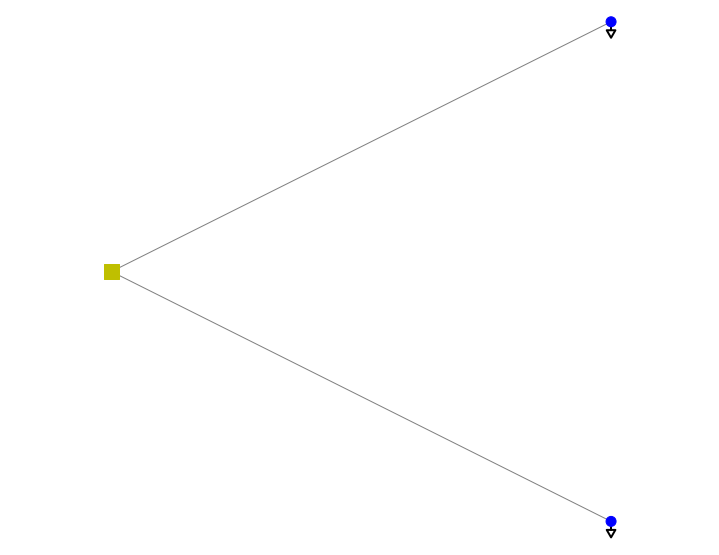

<AxesSubplot:>

In [375]:
simple_plot(net, plot_loads=True, plot_sgens=True)

In [376]:
pp.runopp(net, verbose=True, suppress_warnings=False)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Optimal Power Flow
Python Interior Point Solver - PIPS, Version 1.0, 07-Feb-2011
Converged!

Converged in 0.21 seconds
| PyPower (ppci) System Summary - these are not valid for pandapower DataFrames|

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              3     Total Gen Capacity       1.0          -1.0 to 1.0
Generators         1     On-line Capacity         1.0          -1.0 to 1.0
Committed Gens     1     Generation (actual)      0.0               0.0
Loads              2     Load                     0.0               0.0
  Fixed            2       Fixed                  0.0               0.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           2     Losses (I^2 * Z)         0.00              0.00
Transformers       2

In [377]:
net.res_cost

0.020659621595850344

In [378]:
V_polar = net.res_bus[["vm_pu", "va_degree"]].to_numpy()
V = V_polar[:,0] * np.exp(1j * (V_polar[:,1] / 180 * np.pi))
V

array([1.        +0.j  , 0.94676616-0.02j, 0.98979587-0.01j])

In [379]:
X = V.reshape(-1,1) @ V.conjugate().reshape(1,-1)
X

array([[1.        +0.j        , 0.94676616+0.02j      ,
        0.98979587+0.01j      ],
       [0.94676616-0.02j      , 0.89676616+0.j        ,
        0.93730524-0.01032826j],
       [0.98979587-0.01j      , 0.93730524+0.01032826j,
        0.97979587+0.j        ]])

In [380]:
np.concatenate((net.res_gen[["p_mw", "q_mvar"]].to_numpy(), net.res_sgen[["p_mw", "q_mvar"]].to_numpy(), net.res_ext_grid[["p_mw", "q_mvar"]].to_numpy()))

array([[0.02065962, 0.00032509]])

In [381]:
# array([1.        +0.j  , 0.98979588-0.01j, 0.98979588-0.01j])